In [1]:
#import statements

import math
import matplotlib as  mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rande
import time

mpl.rcParams['savefig.dpi'] = 500
mpl.rcParams['figure.dpi'] = 500

In [46]:
#filen = "ICSData.txt"
filen = "data/volt_vs_pos(1715920601).txt" #15 mV
#filen = "data/volt_vs_pos(1715915640).txt" #30 mV
#filen = "data/volt_vs_pos(1715918152).txt" #60 mV
ics = open(filen, "r")
icsStr = ics.read()
icsArr = icsStr.split('\n')
pos = []
volt = []

for pair in icsArr[2:-1]:
    splitPair = pair.split('\t')
    pos.append(float(splitPair[0]))
    volt.append(float(splitPair[1]))
    
ics.close()

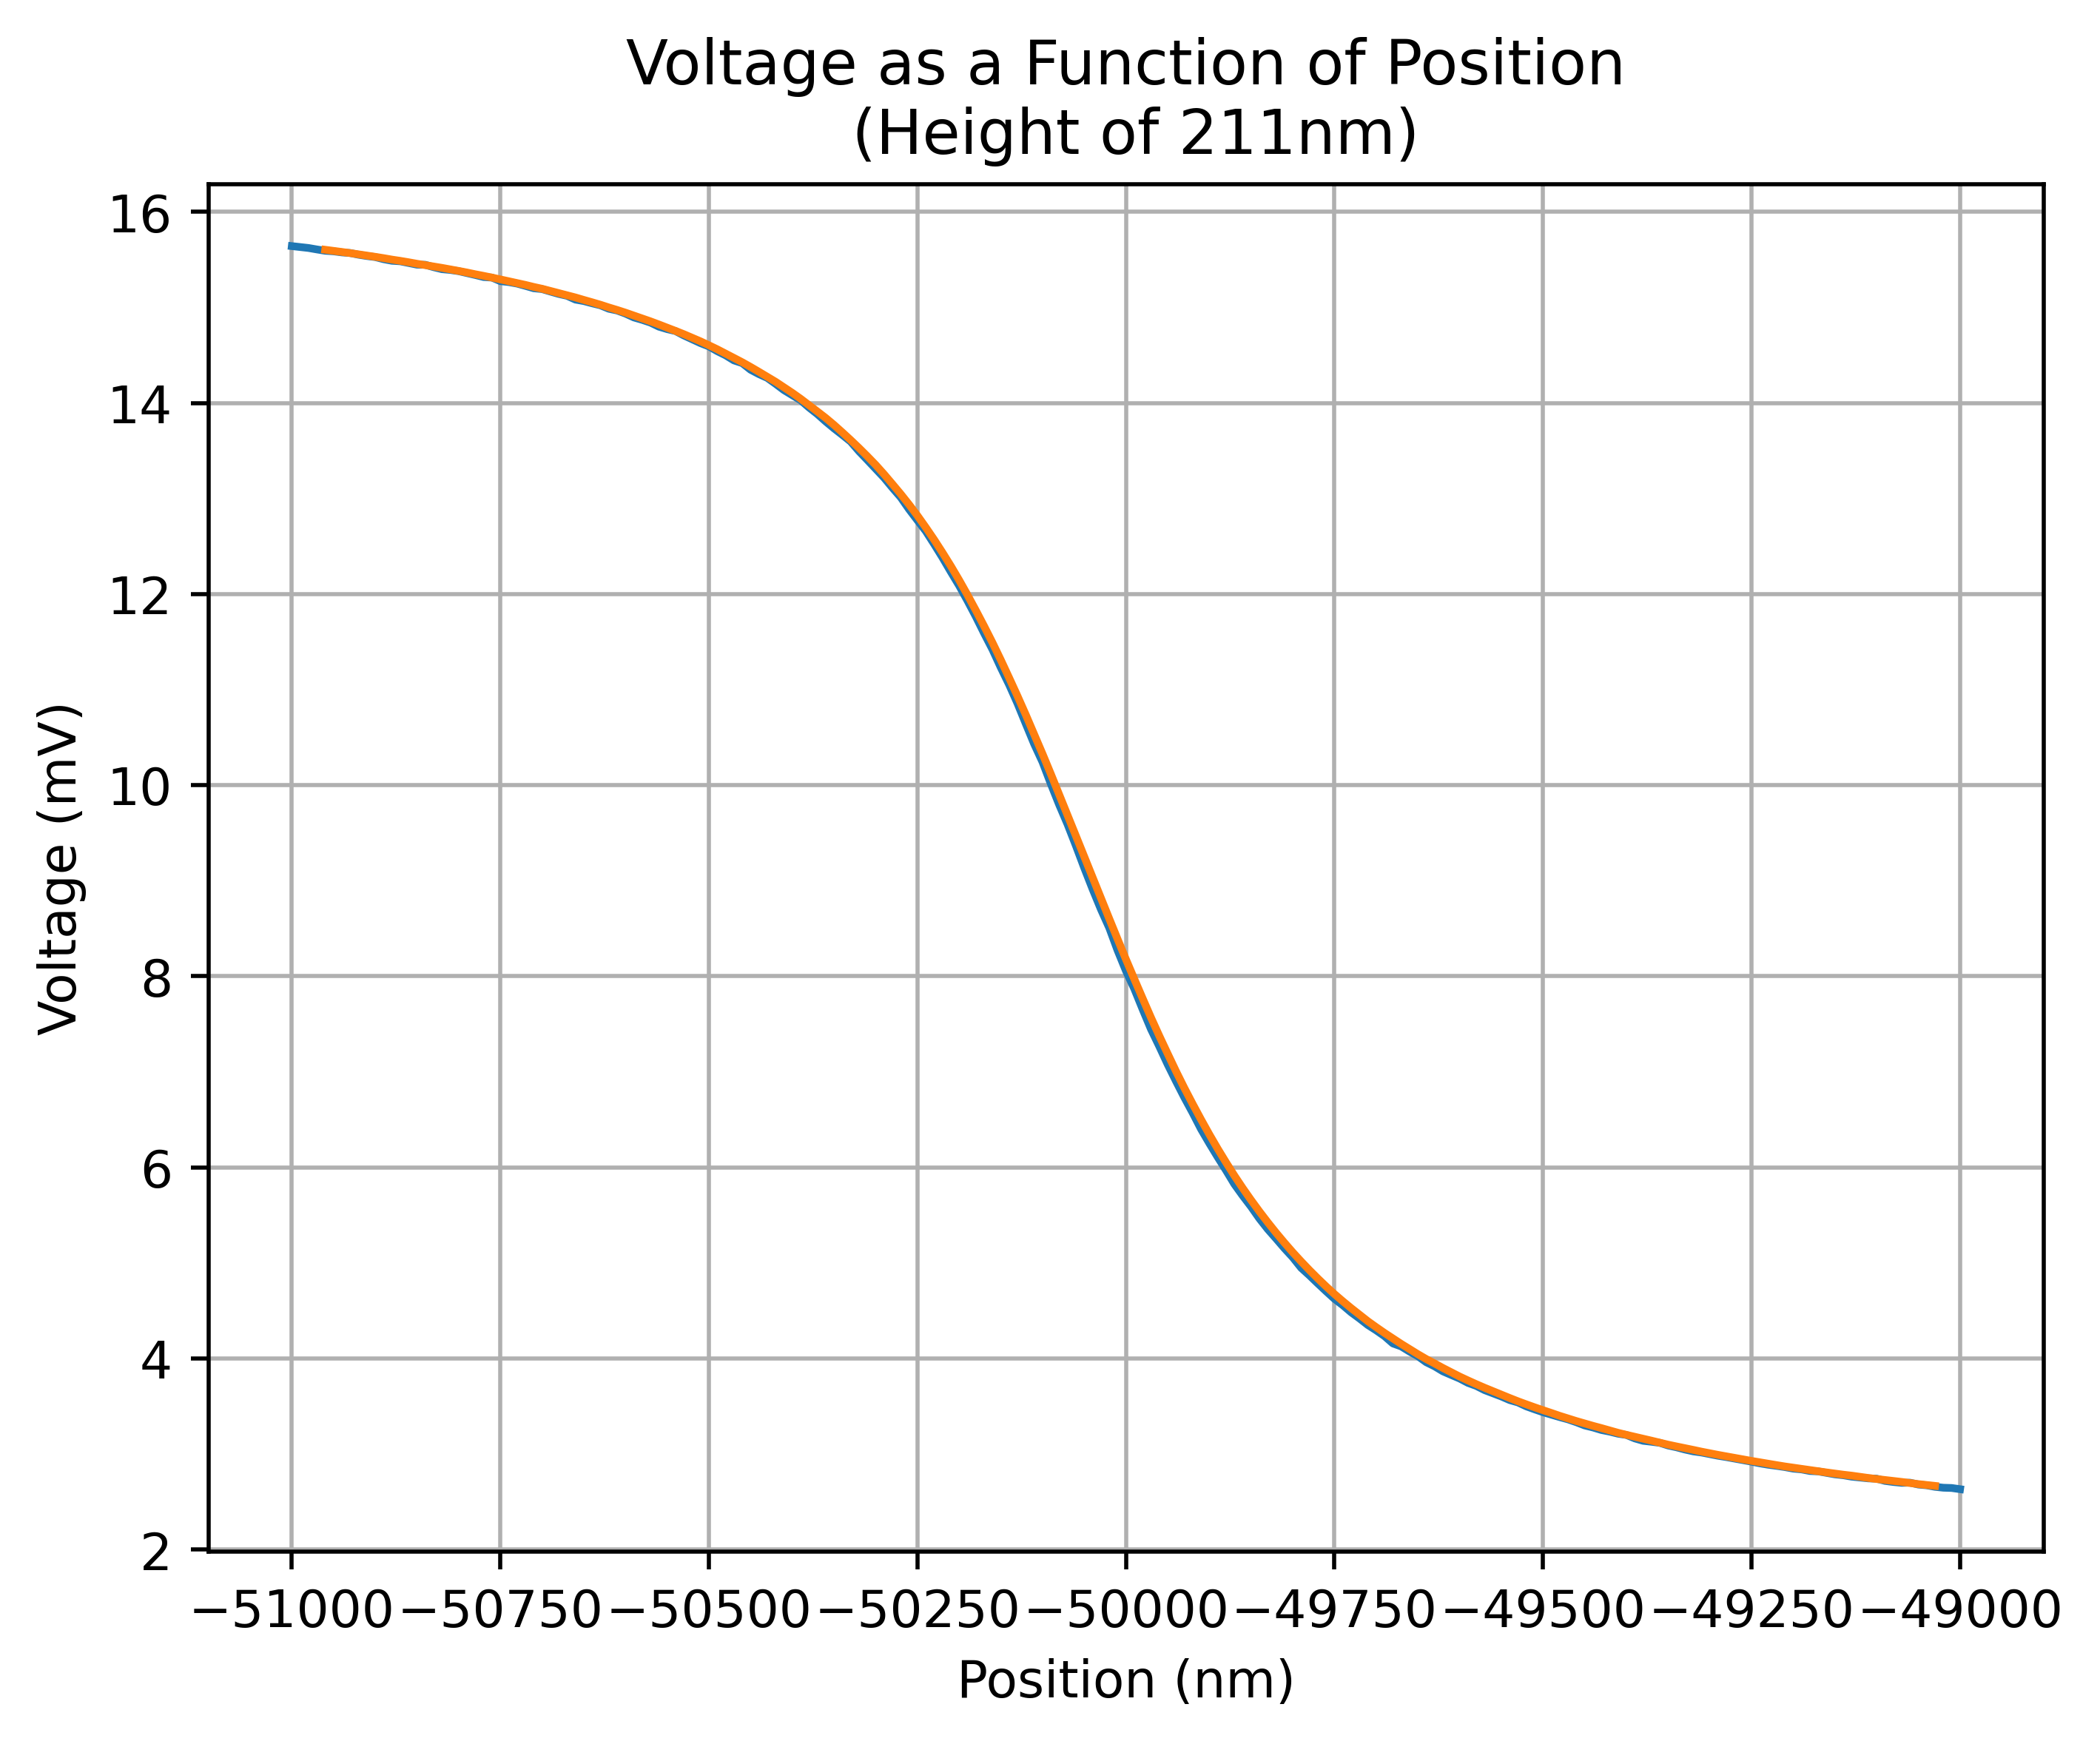

In [47]:
N = 8
voltClean = np.convolve(volt, np.ones(N)/N, mode='valid')
posClean = pos[int(N/2):-int(N/2)+1]

height = int(float(((icsArr[0]).split('\t'))[1]))
hstr = str(height)
tit = "Voltage as a Function of Position"
tit += "\n (Height of " + hstr + "nm)"

fileStr = "data/volt_vs_pos(" + str(int(time.time())) + ")"

plt.plot(pos, volt)
plt.plot(posClean, voltClean)
plt.grid()
plt.xlabel("Position (nm)")
plt.ylabel("Voltage (mV)")
plt.title(tit)

plt.savefig("volt_vs_pos_60mv.png")

plt.show()

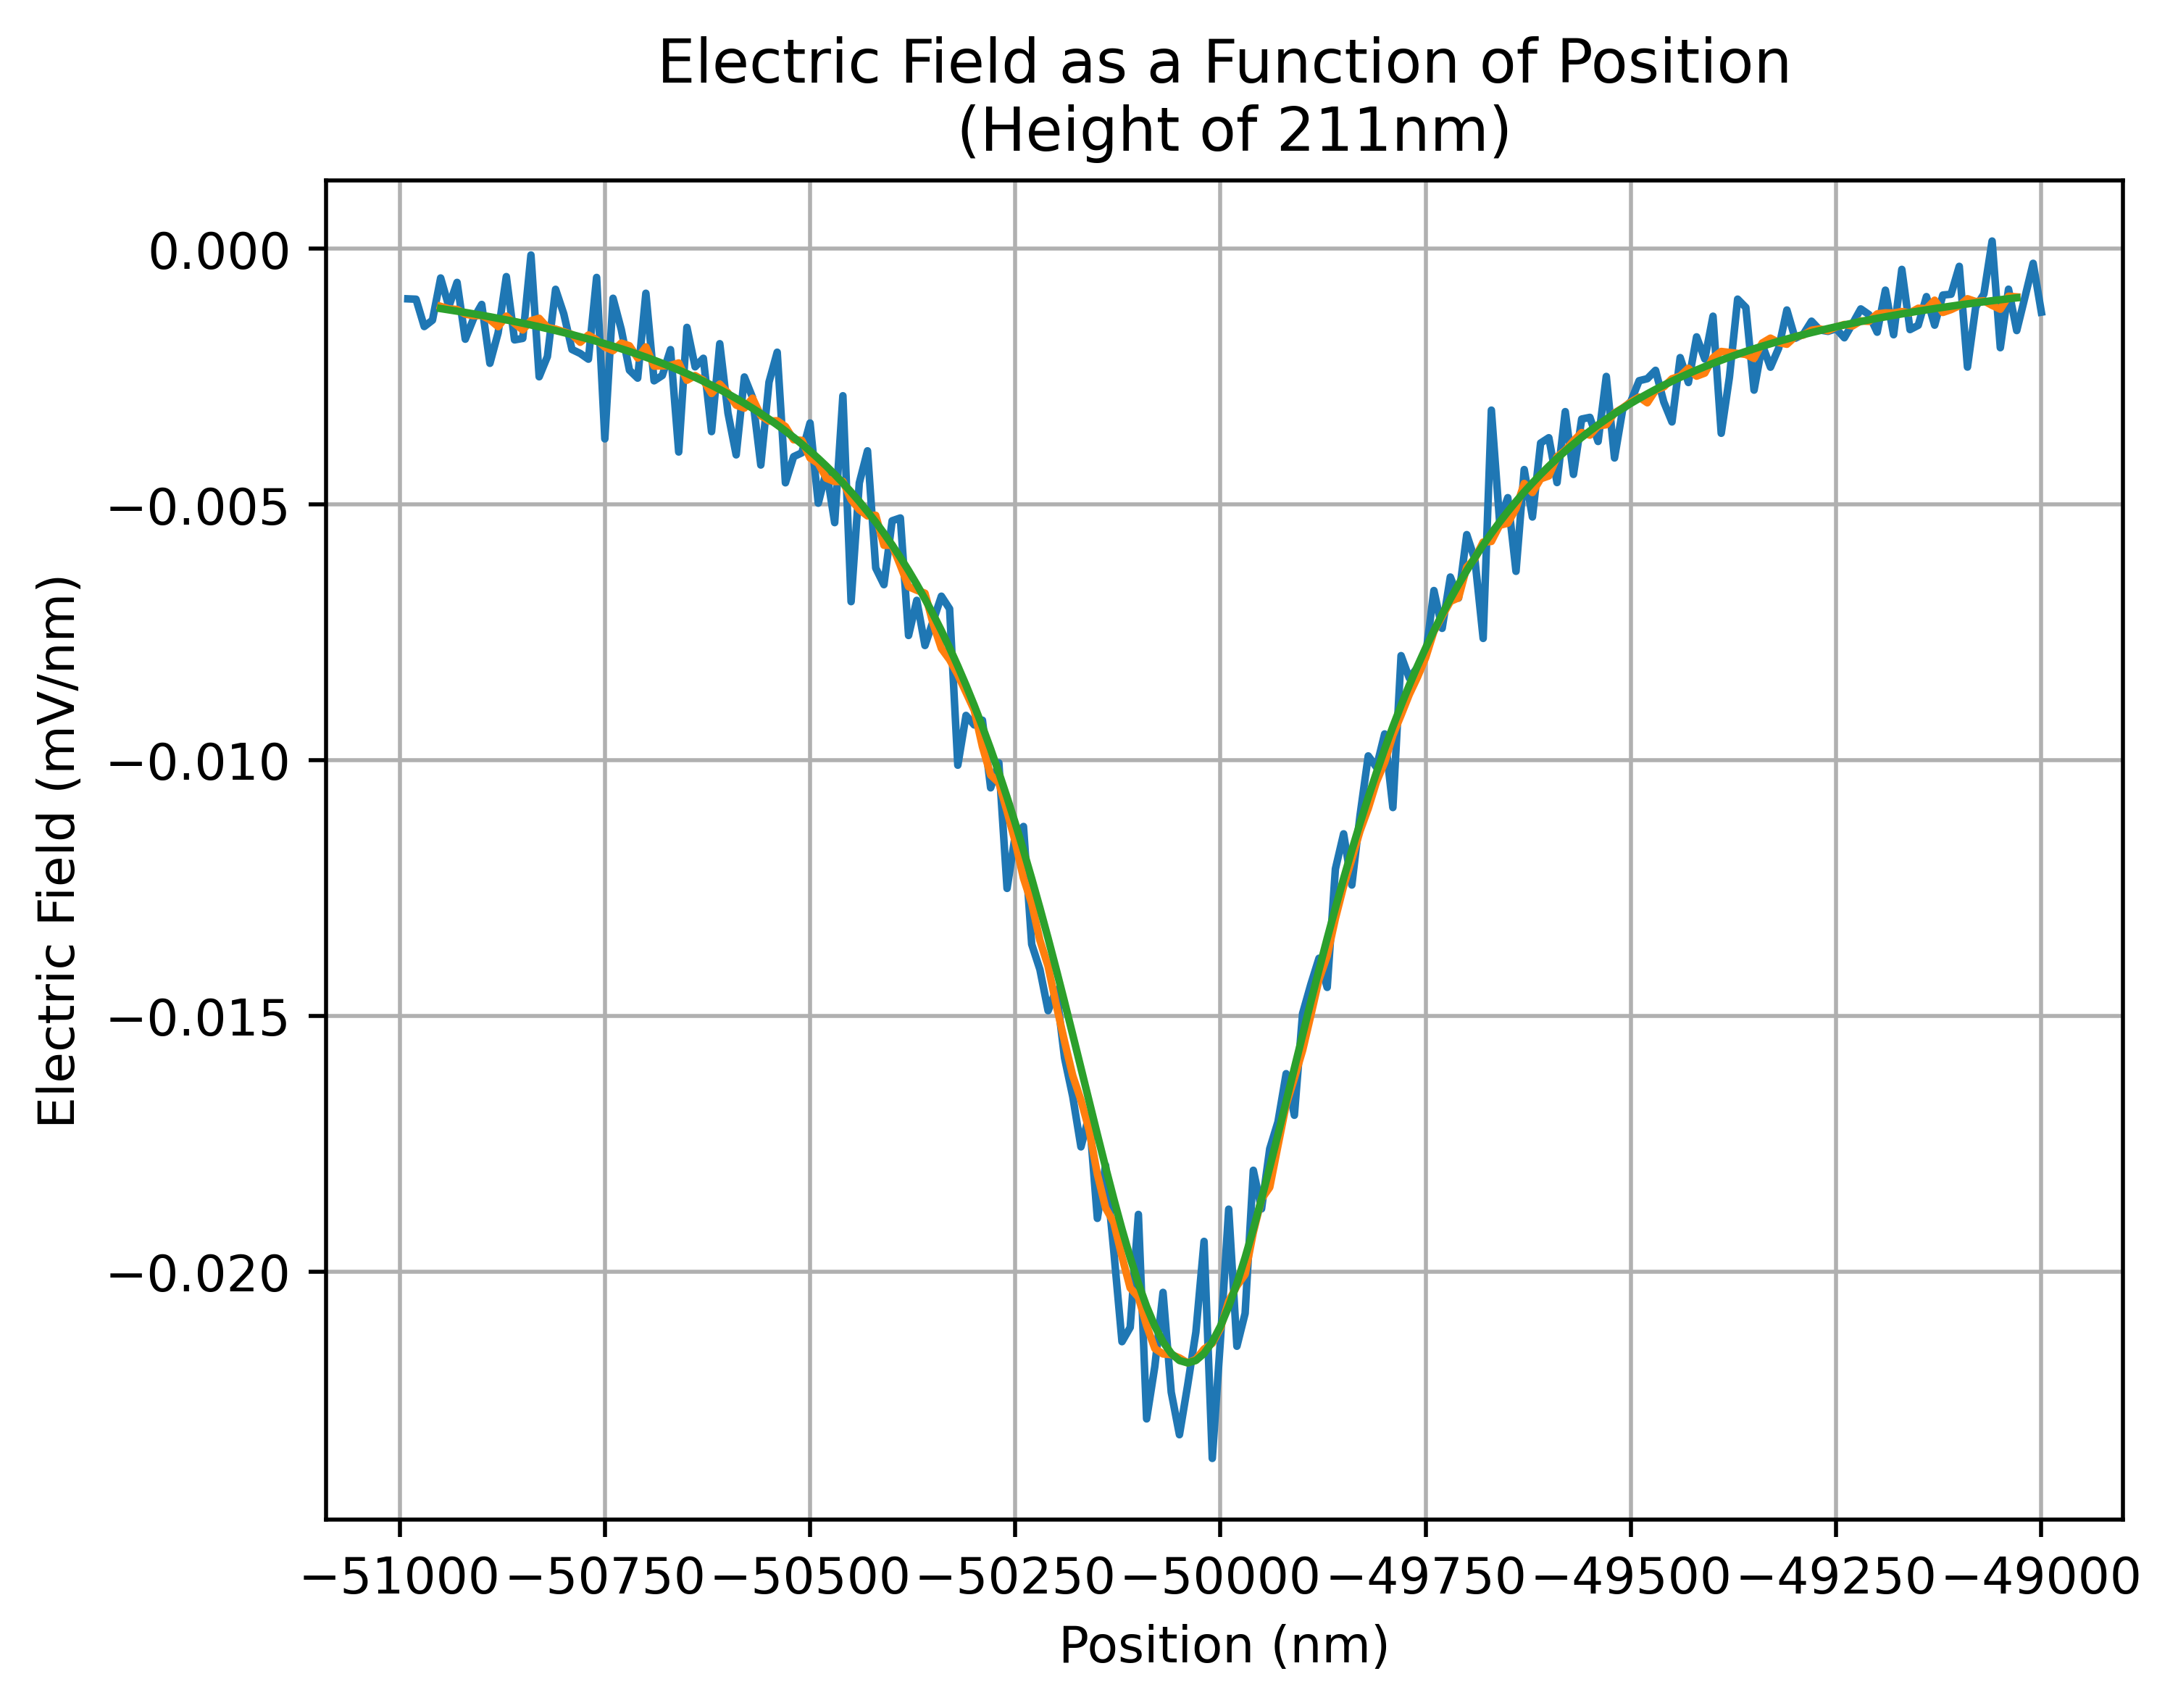

In [48]:
dvdx = []
posdx = []

dx = abs(pos[0] - pos[1])
invdx = 1 / dx

for j in range(len(pos) - 1):
    i = j + 1 #the actual index of the derivative when correlated with the original vector
    posdx.append(pos[i])
    dvdx.append((volt[i] - volt[i - 1]) * invdx)
    
plt.plot(posdx, dvdx)
#plt.grid()
#plt.xlabel("Position (nm)")
#plt.ylabel("Electric Field (mV/nm)")
#plt.title(tit)

#plt.show()

dvcdx = []
poscdx = []

dx = abs(posClean[0] - posClean[1])
invdx = 1 / dx

for j in range(len(posClean) - 1):
    i = j + 1 #the actual index of the derivative when correlated with the original vector
    poscdx.append(posClean[i])
    dvcdx.append((voltClean[i] - voltClean[i - 1]) * invdx)
    
tit = "Electric Field as a Function of Position"
tit += "\n (Height of " + hstr + "nm)"

param1 = 1.3
lorenFit = min(dvcdx) * param1 * (param1 / ((4 * np.square(np.multiply(np.add(poscdx, 50040), (3e6) * (1e-9)))) + (param1 ** 2)))
    
plt.plot(poscdx, dvcdx)
plt.plot(poscdx, lorenFit)
plt.grid()
plt.xlabel("Position (nm)")
plt.ylabel("Electric Field (mV/nm)")
plt.title(tit)

#plt.savefig("efield_vs_pos_60mv.png")

plt.show()

In [104]:
print(min(dvcdx))

-0.021784374999999835


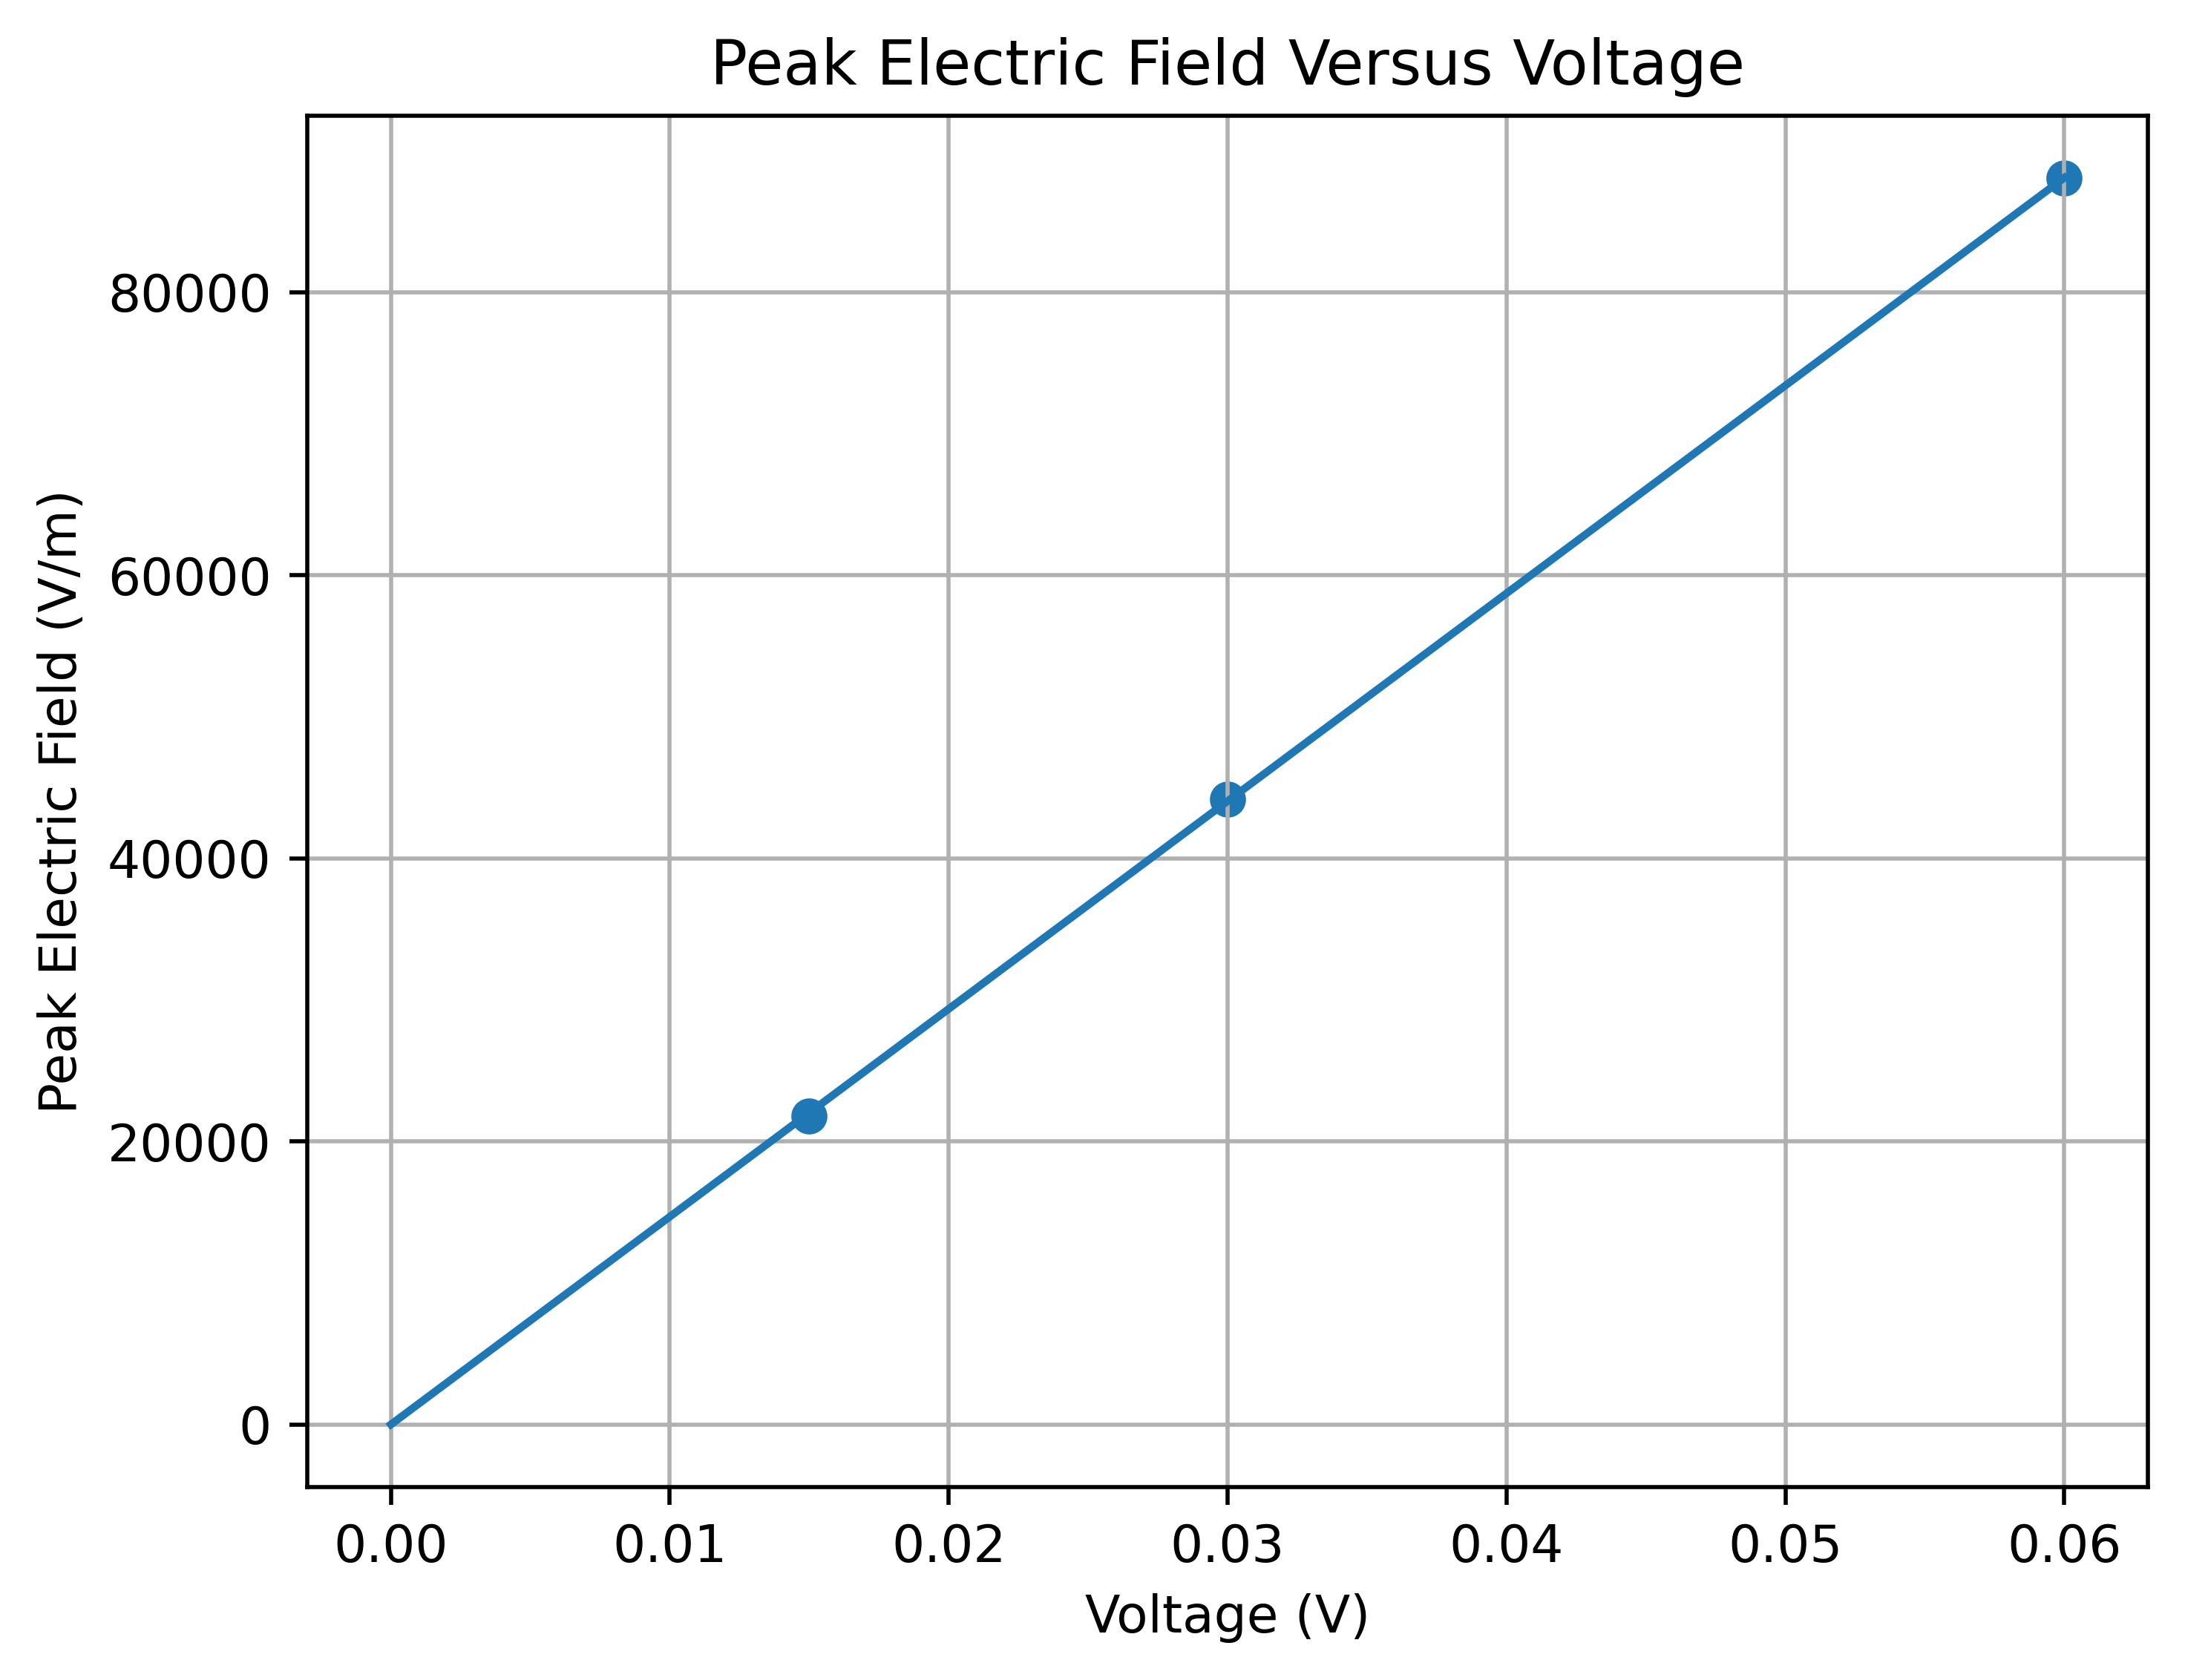

In [126]:
EmaxWeird = np.array([0.021784374999999835, 0.04414859999999976, 0.08807017500000001]) #mV/nm

Emax = EmaxWeird * (1e9 * 1e-3) #V/m
V = np.array([0.015, 0.03, 0.06]) #V

plt.plot([0, max(V)], [0, max(Emax)])
plt.scatter(V, Emax)

plt.grid()
plt.xlabel("Voltage (V)")
plt.ylabel("Peak Electric Field (V/m)")
plt.title("Peak Electric Field Versus Voltage")

plt.savefig("efieldpeak_vs_volt.png")

plt.show()

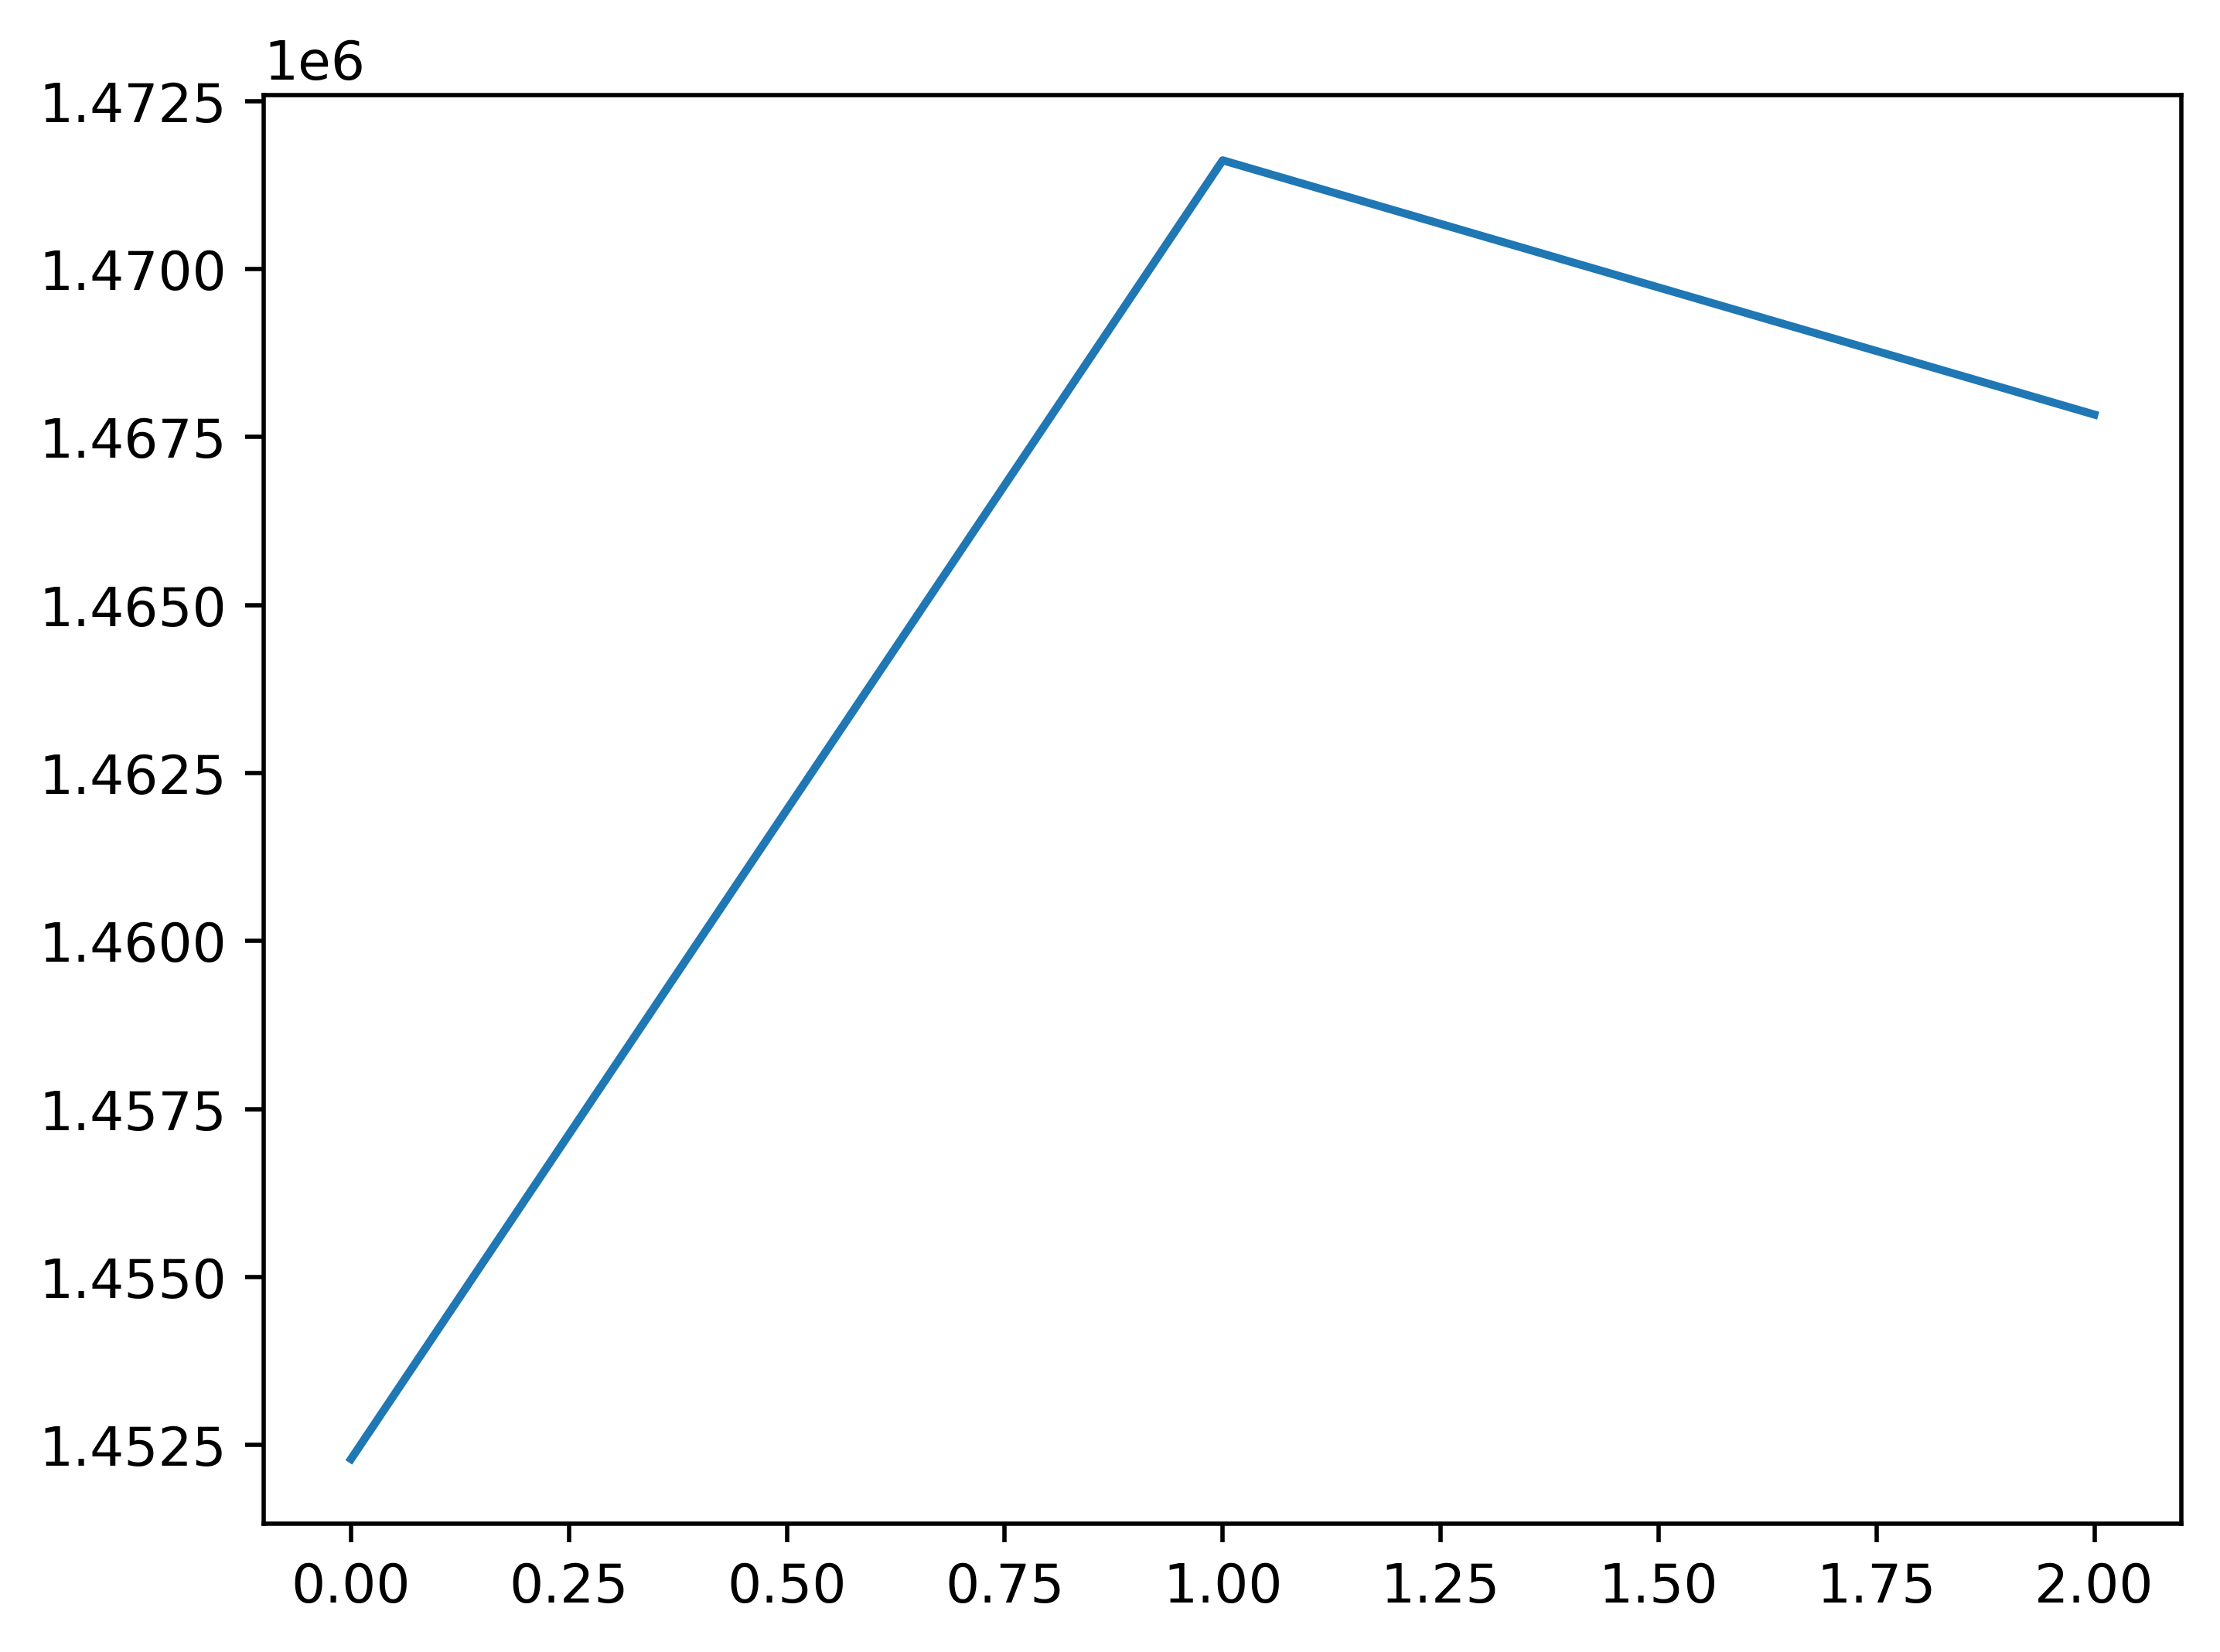

In [110]:
rate = np.divide(Emax, V)
plt.plot(rate)

plt.show()

In [112]:
np.average(rate)

1463915.9722222162